# Load packages and dependencies

In [1]:
import os
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from google.colab import drive
import seaborn as sns
import librosa
from sklearn.metrics import confusion_matrix
import IPython.display as display

# Connect the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocess the data

In [3]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    # Dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLE_RATE * AUDIO_DURATION / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # Loop through all sub-folders
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # Ensure we're processing the sub-folder level
        if dirpath is not dataset_path:

            # Save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print(f"\nProcessing: {semantic_label}")

            # Process all audio files in the genre sub-dir
            for f in filenames:

                # Load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # Process all segments of the audio file
                for d in range(num_segments):

                    # Calculate start and finish sample for the current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # Extract MFCC
                    mfcc = librosa.feature.mfcc(
                        y=signal[start:finish],
                        sr=sample_rate,
                        n_mfcc=num_mfcc,
                        n_fft=n_fft,
                        hop_length=hop_length
                    )

                    mfcc = mfcc.T

                    # Store only MFCC features with the expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print(f"{file_path}, segment:{d+1}")

    # Save MFCCs to JSON file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

    # Return the data dictionary
    return data


# Load the raw data

In [4]:
DATASET_PATH = "/content/drive/My Drive/dataset/luganda_data_set"
JSON_PATH = "/content/drive/My Drive/Colab Notebooks/data.json"
SAMPLE_RATE = 22050  # Corrected the sample rate
AUDIO_DURATION = 3  # measured in seconds
SAMPLES_PER_AUDIO = SAMPLE_RATE * AUDIO_DURATION

## Save the mfcc data

In [5]:
data = save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: mu masso
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:4


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:2
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1293
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-62.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-73.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-73.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:1
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=411
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-222.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-222.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-222.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-227.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-227.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-227.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-227.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-227.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-232.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-232.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-232.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-232.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=852
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-430.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-430.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-430.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-430.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1734
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-664.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-664.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-664.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-680.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-680.wav, se

## Load json file

In [6]:
def load_data(data):

    # Convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data successfully loaded!")

    return X, y

In [7]:
# Load data
X, y = load_data(data)

Data successfully loaded!


# Split Data into Training and Testing Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build a Neural Network Model

In [9]:
input_shape = X_train.shape[1:]

model = models.Sequential([
    layers.Resizing(32, 32),
    layers.Normalization(axis=-1),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(np.max(y) + 1),
])


## Compile the model

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)


# Train the Model

In [11]:
history = model.fit(
    X_train[..., tf.newaxis],
    y_train,
    validation_data=(X_test[..., tf.newaxis], y_test),
    epochs=10,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)


Epoch 1/10
83/83 [==============================] - 14s 154ms/step - loss: 5.3766 - accuracy: 0.1953 - val_loss: 1.7689 - val_accuracy: 0.2352
Epoch 2/10
83/83 [==============================] - 11s 137ms/step - loss: 1.7483 - accuracy: 0.2290 - val_loss: 1.7444 - val_accuracy: 0.2538
Epoch 3/10
83/83 [==============================] - 11s 138ms/step - loss: 1.7175 - accuracy: 0.2567 - val_loss: 1.7650 - val_accuracy: 0.2166
Epoch 4/10
83/83 [==============================] - 12s 147ms/step - loss: 1.6831 - accuracy: 0.2818 - val_loss: 1.7172 - val_accuracy: 0.2617
Epoch 5/10
83/83 [==============================] - 13s 153ms/step - loss: 1.6187 - accuracy: 0.3250 - val_loss: 1.7017 - val_accuracy: 0.2856
Epoch 6/10
83/83 [==============================] - 10s 119ms/step - loss: 1.5417 - accuracy: 0.3625 - val_loss: 1.7060 - val_accuracy: 0.2989
Epoch 7/10
83/83 [==============================] - 12s 142ms/step - loss: 1.4300 - accuracy: 0.4221 - val_loss: 1.7083 - val_accuracy: 0.2980

### Extract label names from the data dictionary


In [12]:
label_names = data["mapping"]

## Plot confusion matrix for test set


In [13]:
def plot_confusion_matrix(y_true, y_pred, label_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, xticklabels=label_names, yticklabels=label_names, annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.title('Confusion Matrix')
    plt.show()


36/36 [==============================] - 1s 24ms/step


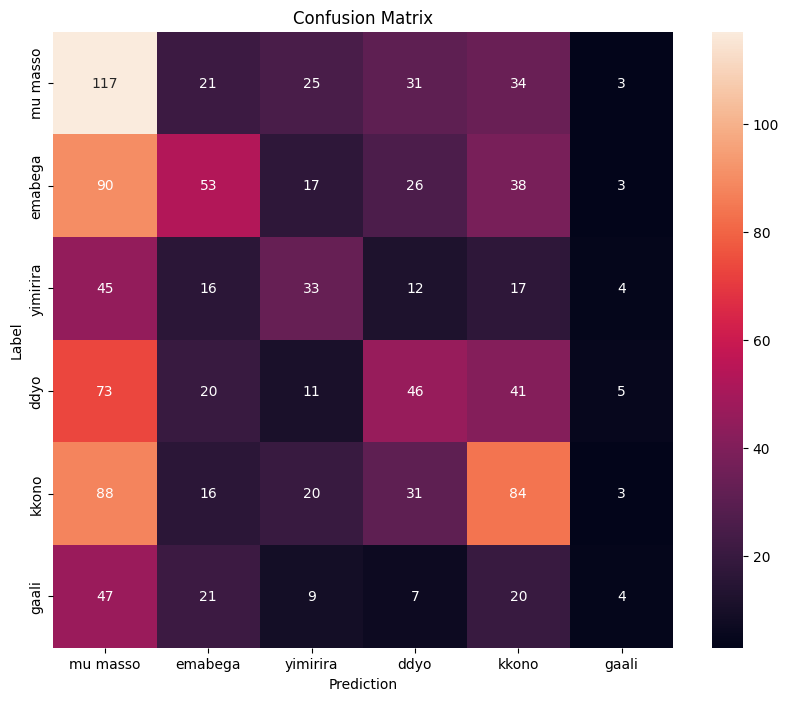

In [14]:
y_pred = model.predict(X_test[..., tf.newaxis])
y_pred = np.argmax(y_pred, axis=1)
plot_confusion_matrix(y_test, y_pred, label_names)

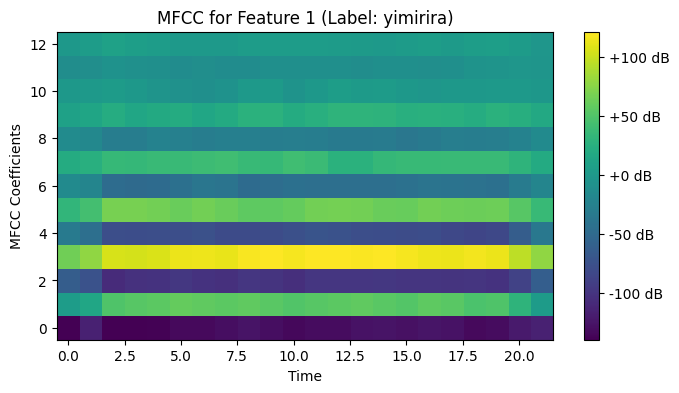

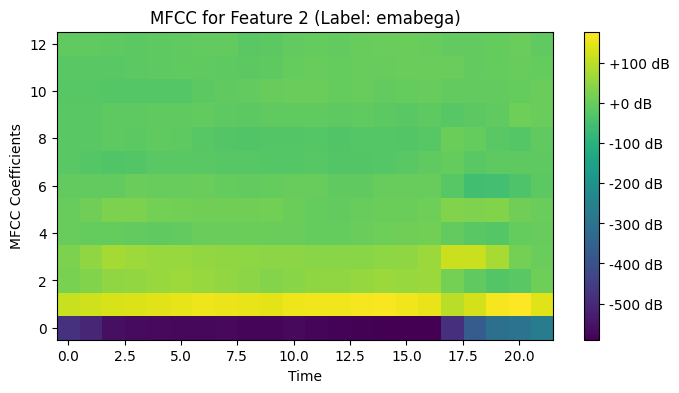

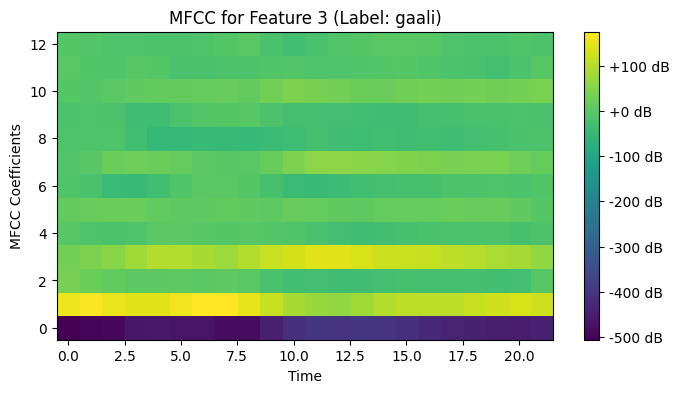

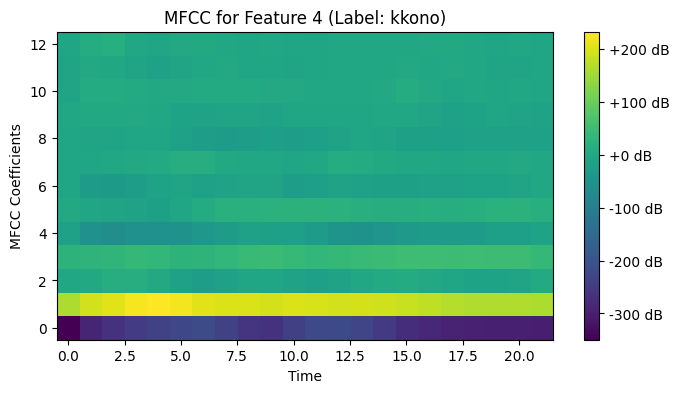

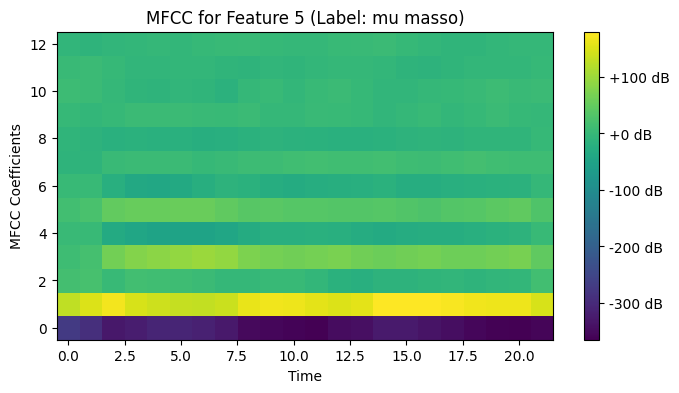

In [15]:
num_features_to_display = 5
for i in range(num_features_to_display):
    index = np.random.randint(0, len(X_test))
    mfcc_feature = X_test[index]
    label = y_test[index]

    plt.figure(figsize=(8, 4))
    plt.imshow(mfcc_feature.T, cmap='viridis', origin='lower', aspect='auto')
    plt.title(f'MFCC for Feature {i + 1} (Label: {label_names[label]})')
    plt.xlabel('Time')
    plt.ylabel('MFCC Coefficients')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

## History

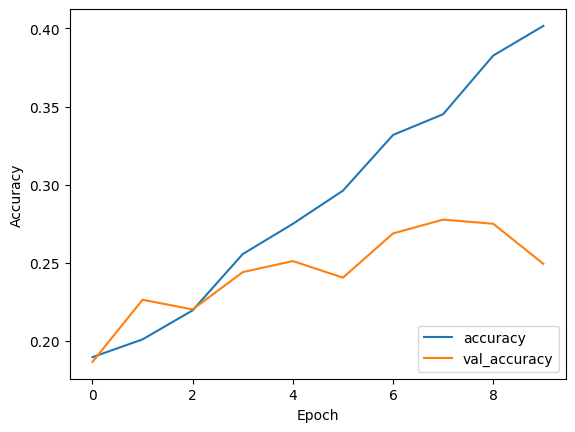

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test[..., tf.newaxis], y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc}')
print(f'\nTest Loss: {test_loss}')

36/36 - 1s - loss: 1.7422 - accuracy: 0.2493 - 913ms/epoch - 25ms/step

Test Accuracy: 0.2493368685245514

Test Loss: 1.7421590089797974


# Save and Export Model

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/audio_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
